In [2]:
import pandas as pd
from sklearn.linear_model import (
    LogisticRegression,
    PassiveAggressiveClassifier,
    RidgeClassifier,
)
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [31]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv"
)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [8]:
y.shape, X.shape

((768,), (768, 8))

In [9]:
model = LogisticRegression()
model.fit(X, y)

c:\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", model.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35999295e-02 -1.40873538e-02 -1.27044937e-03
 -1.24032635e-03  7.72022437e-02  1.41904200e+00  1.00352835e-02]


In [11]:
for k, v in zip(X.columns, model.coef_[0]):
    print(k, v)

Pregnancies 0.11725234182833266
Glucose 0.03359992949701687
BloodPressure -0.014087353766198364
SkinThickness -0.0012704493706294675
Insulin -0.0012403263477329845
BMI 0.07720224366674312
DiabetesPedigreeFunction 1.419042000962668
Age 0.010035283478542241


In [12]:
print("Intercept: \n", model.intercept_)

Intercept: 
 [-7.70292103]


<Axes: >

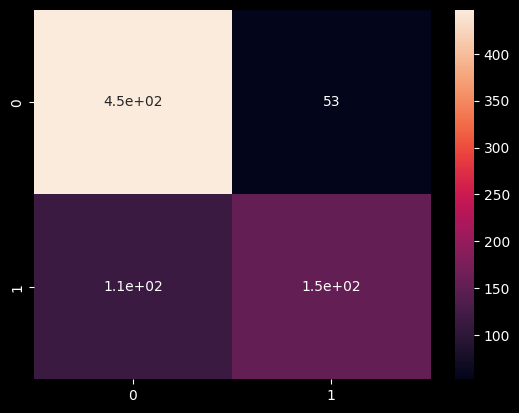

In [13]:
y_pred = model.predict(X)
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [14]:
model.score(X, y)

0.7825520833333334

In [15]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [16]:
poly = PolynomialFeatures(2)

In [17]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [40]:
model = LogisticRegression(tol=100)
model.fit(X, y)
y_pred_poly = model.predict(X)
print(f"{model.score(X, y):.3%}")
# При большом допуске ухудшается результат

69.922%


In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
y_pred_poly = model.predict(X)
print(f"{model.score(X, y):.3%}")
# Как ни странно, увеличение числа итераций обучения ухудшает результат

78.125%


In [51]:
model = LogisticRegression(solver="liblinear")
model.fit(X, y)
y_pred_poly = model.predict(X)
print(f"{model.score(X, y):.3%}")
# Использование других олгаритмов оптимизации только ухудшело результат

77.474%


1) Изучите документацию sklearn, посвященную классу LogisticRegression.\
Какую еще информацию можно вывести для обученной модели?\
Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [20]:
polynomial = LogisticRegression(C=0.5)
polynomial.fit(X, y)
# y_pred_poly = polynomial.predict(poly)
polynomial.score(X, y)

c:\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7825520833333334

В классе LogisticRegretion можно ввести параметр C, который является обратной величиной силы регуляризации. В классе на default установлен 1. При уменьшении параметра метрика уменьшается, а при увеличении может как и возрастать, так и убывать.

2) Попробуйте применить к той же задаче другие модели классификации.\
    Для каждой из них выведите матрицу классификации и оценку точности.\
    Рекомендуется исследовать следующие модели:
        
    1) Метод опорных векторов
        1) Без ядра
        2) С линейным ядром
        3) С гауссовым ядром
        4) С полиномиальным ядром
    2) Метод ближайших соседей
    3) Многослойный перцептрон
    4) Дерево решений
    5) Наивный байесовский классификатор
    6) Другие методы
        1) Пассивно-агрессивный классификатор
        2) Гребневый классификатор
        3) Случайный лес
        4) Беггинг




3) Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [21]:
def test(X, y, Model, name, kwargs={}):
    # Создаем модель
    model = Model(**kwargs)
    # Обучаем
    model.fit(X, y)
    y_pred = model.predict(X)
    # Выводим качество модели
    print(f"{name}: {metrics.accuracy_score(y, y_pred):.3%}")
    # Рисуем график
    fig, ax = plt.subplots()
    ax.set_title(name)
    sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True, ax=ax)
    plt.show()

In [22]:
methods = [
    [SVC, "Метод опорных векторов с линейным ядром"],
    # Может долго обучаться
    [SVC, "Метод опорных векторов с Гауссовым ядром", {"kernel": "rbf"}],
    # Может долго обучаться
    [SVC, "Метод опорных векторов с полиномиальным ядром", {"kernel": "poly"}],
    [KNeighborsClassifier, "Метод ближайших соседей"],
    [
        MLPClassifier,
        "Многослойный персептрон",
        {"hidden_layer_sizes": (4, 2)},
    ],
    [DecisionTreeClassifier, "Дерево решений"],
    [GaussianNB, "Наивный байесовский классификатор"],
    [PassiveAggressiveClassifier, "Пассивно-агрессивный классификатор"],
    [RidgeClassifier, "Гребневый классификатор"],
    [RandomForestClassifier, "Случайный лес"],
    [BaggingClassifier, "Беггинг"],
]

Метод опорных векторов с линейным ядром: 76.823%


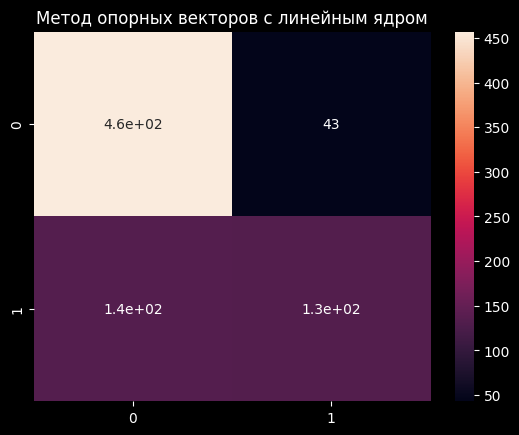

Метод опорных векторов с Гауссовым ядром: 76.823%


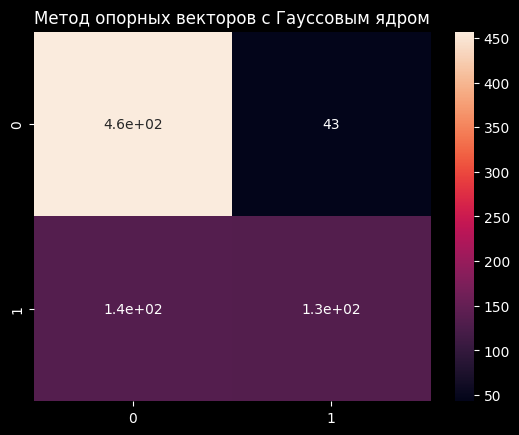

Метод опорных векторов с полиномиальным ядром: 77.604%


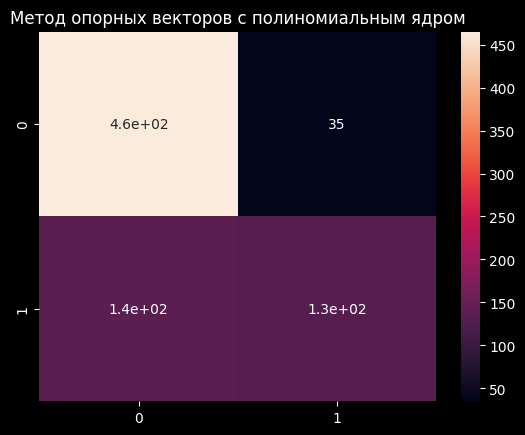

Метод ближайших соседей: 80.339%


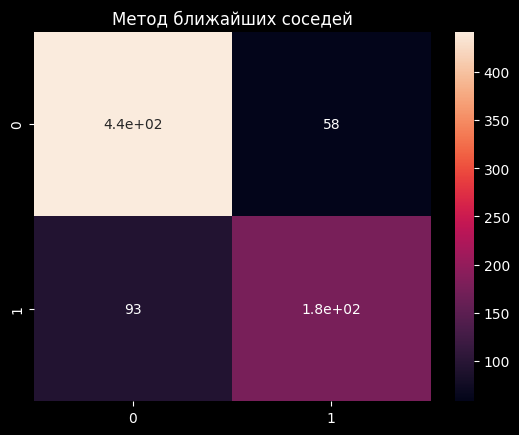

c:\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Многослойный персептрон: 34.896%


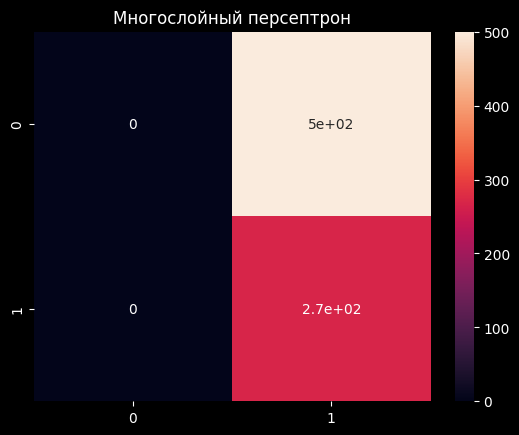

Дерево решений: 100.000%


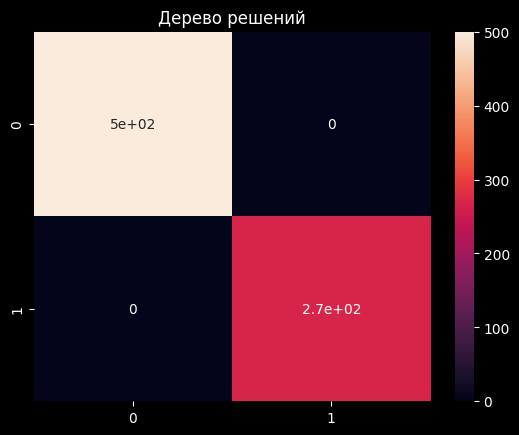

Наивный байесовский классификатор: 76.302%


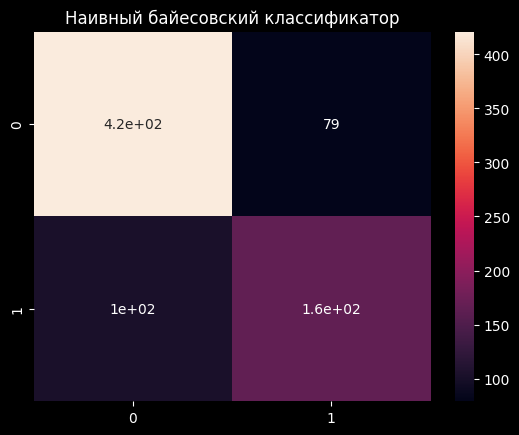

Пассивно-агрессивный классификатор: 65.495%


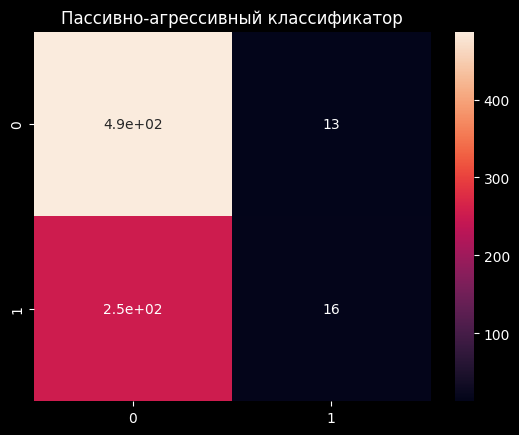

Гребневый классификатор: 78.255%


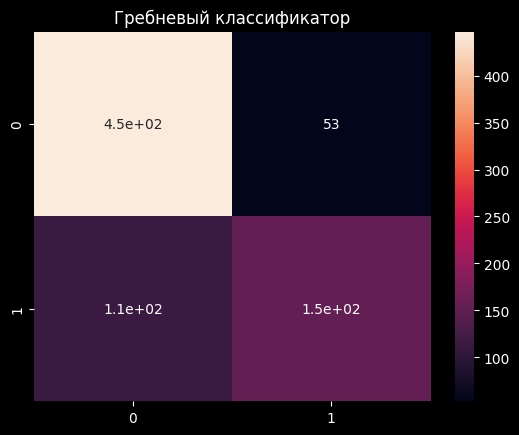

Случайный лес: 100.000%


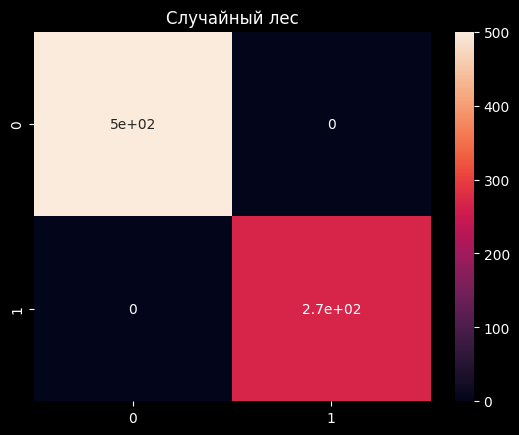

Беггинг: 98.568%


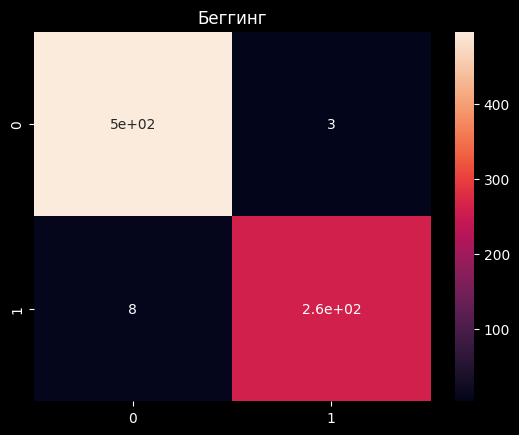

In [23]:
for d in methods:
    test(X, y, *d)

---
4) Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения

(можно использовать метод sklearn.datasets.load_iris())

In [24]:
iris = datasets.load_iris()

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
y = iris.target
X = iris.data

In [27]:
iris_model = LogisticRegression()
iris_model.fit(X, y)

c:\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = iris_model.predict(X)
iris_model.score(X, y)

0.9733333333333334

<Axes: >

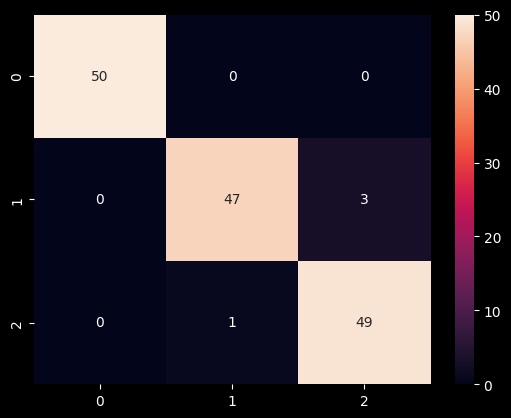

In [29]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Ирис предсказывается очень точно